In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
#loading the dataset
df=pd.read_csv('/kaggle/input/alzheimers-disease-and-healthy-aging-data/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')
df.head()

/tmp/ipykernel_32/809759614.py:2: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/kaggle/input/alzheimers-disease-and-healthy-aging-data/Alzheimer_s_Disease_and_Healthy_Aging_Data.csv')


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Response,...,QuestionID,ResponseID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3,Report
0,NaN,2021,2021,WEST,West,BRFSS,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,NaN,...,Q01,NaN,9004,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
1,NaN,2021,2021,NRE,Northeast,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,NaN,...,Q02,NaN,9001,AGE,5064,OVERALL,OVERALL,NaN,NaN,NaN
2,NaN,2021,2021,MDW,Midwest,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,NaN,...,Q03,NaN,9002,AGE,5064,RACE,BLK,NaN,NaN,NaN
3,NaN,2021,2021,WEST,West,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,NaN,...,Q08,NaN,9004,AGE,65PLUS,OVERALL,OVERALL,NaN,NaN,NaN
4,NaN,2021,2021,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,NaN,...,Q43,NaN,9002,AGE,65PLUS,RACE,HIS,NaN,NaN,NaN


# #Shape of the Dataset

In [52]:
df.shape

(250937, 39)

# Number of columns in the dataset

In [53]:
df.columns

Index(['RowId', 'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc',
       'Datasource', 'Class', 'Topic', 'Question', 'Response',
       'Data_Value_Unit', 'DataValueTypeID', 'Data_Value_Type', 'Data_Value',
       'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'Geolocation', 'ClassID', 'TopicID', 'QuestionID', 'ResponseID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3', 'Report'],
      dtype='object')

# Checking for Missing Values in the Dataset

# Checking for Datatype of each column

In [54]:
df.dtypes

RowId                         float64
YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Response                      float64
Data_Value_Unit                object
DataValueTypeID                object
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit           object
High_Confidence_Limit          object
Sample_Size                   float64
StratificationCategory1        object
Stratification1                object
StratificationCategory2        object
Stratification2                object
StratificationCategory3       float64
Stratification3               float64
Geolocation 

In [55]:
columns_with_missing_values=list(df.isna().mean()[df.isna().mean()>0.5].index)
df.drop(columns_with_missing_values,axis=1,inplace=True)
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2021,2021,WEST,West,BRFSS,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,%,PRCTG,...,NaN,NaN,C02,TNC01,Q01,9004,AGE,5064,OVERALL,OVERALL
1,2021,2021,NRE,Northeast,BRFSS,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,PRCTG,...,NaN,NaN,C02,TNC02,Q02,9001,AGE,5064,OVERALL,OVERALL
2,2021,2021,MDW,Midwest,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,...,"Black, non-Hispanic",NaN,C05,TMC01,Q03,9002,AGE,5064,RACE,BLK
3,2021,2021,WEST,West,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,NaN,C01,TOC01,Q08,9004,AGE,65PLUS,OVERALL,OVERALL
4,2021,2021,MDW,Midwest,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,Hispanic,NaN,C01,TOC11,Q43,9002,AGE,65PLUS,RACE,HIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,2017,2017,WY,Wyoming,BRFSS,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,%,PRCTG,...,Male,POINT (-108.10983035299967 43.23554134300048),C02,TNC01,Q01,56,AGE,65PLUS,GENDER,MALE
250933,2016,2016,WY,Wyoming,BRFSS,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,...,"Black, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,BLK
250934,2015,2015,WV,West Virginia,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,...,Male,POINT (-80.71264013499967 38.66551020200046),C05,TMC01,Q03,54,AGE,5064,GENDER,MALE
250935,2018,2018,WV,West Virginia,BRFSS,Nutrition/Physical Activity/Obesity,Obesity,Percentage of older adults who are currently o...,%,PRCTG,...,Male,POINT (-80.71264013499967 38.66551020200046),C02,TNC04,Q13,54,AGE,5064,GENDER,MALE


<Axes: >

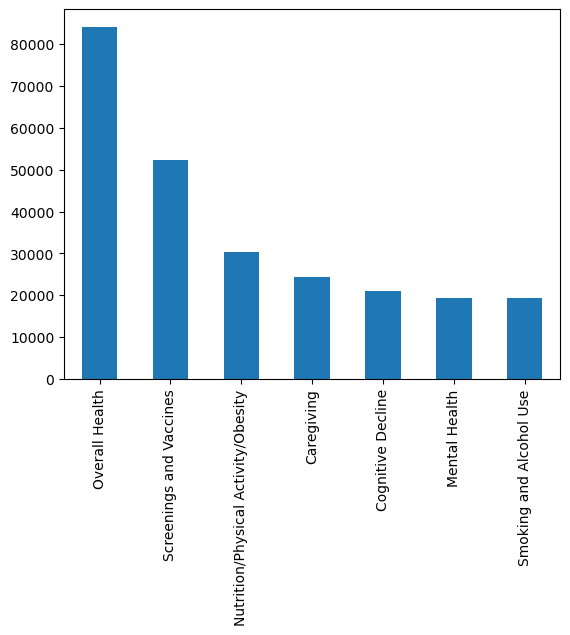

In [56]:
df['Class'].value_counts().plot(kind='bar')

In [57]:
df.drop('Datasource',axis=1,inplace=True)

In [60]:
{column:list(df[column].unique()) for column in df.columns}

{'YearStart': [2021, 2020, 2018, 2016, 2015, 2017, 2019],
 'YearEnd': [2021, 2020, 2018, 2016, 2015, 2017, 2019],
 'LocationAbbr': ['WEST',
  'NRE',
  'MDW',
  'ID',
  'LA',
  'MA',
  'MD',
  'NM',
  'OH',
  'OR',
  'SC',
  'SOU',
  'WI',
  'TN',
  'NH',
  'KS',
  'UT',
  'RI',
  'MI',
  'WA',
  'VA',
  'AZ',
  'MS',
  'MT',
  'WV',
  'MO',
  'VT',
  'PA',
  'NC',
  'NJ',
  'AR',
  'HI',
  'CT',
  'MN',
  'TX',
  'NE',
  'NY',
  'ME',
  'AK',
  'GA',
  'IN',
  'KY',
  'ND',
  'OK',
  'WY',
  'DC',
  'IA',
  'AL',
  'SD',
  'IL',
  'CO',
  'NV',
  'CA',
  'DE',
  'US',
  'VI',
  'PR',
  'GU',
  'FL'],
 'LocationDesc': ['West',
  'Northeast',
  'Midwest',
  'Idaho',
  'Louisiana',
  'Massachusetts',
  'Maryland',
  'New Mexico',
  'Ohio',
  'Oregon',
  'South Carolina',
  'South',
  'Wisconsin',
  'Tennessee',
  'New Hampshire',
  'Kansas',
  'Utah',
  'Rhode Island',
  'Michigan',
  'Washington',
  'Virginia',
  'Arizona',
  'Mississippi',
  'Montana',
  'West Virginia',
  'Missouri',
 

In [61]:
df['StratificationID2'].value_counts()

OVERALL    32376
WHT        32332
HIS        32205
BLK        31649
NAA        31050
ASN        30773
FEMALE     30276
MALE       30276
Name: StratificationID2, dtype: int64

In [62]:
df['StratificationID1'].value_counts()

AGE_OVERALL    84147
5064           83695
65PLUS         83095
Name: StratificationID1, dtype: int64

In [69]:
df[(df['StratificationID2']=='WHT')&(df['StratificationID1']=='5064')]

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
60,2021,2021,VA,Virginia,Screenings and Vaccines,Cholesterol checked in past 5 years,Percentage of older adults who had a cholester...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-78.45789046299967 37.54268067400045),C03,TSC06,Q14,51,AGE,5064,RACE,WHT
70,2021,2021,PA,Pennsylvania,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-77.86070029399963 40.79373015200048),C02,TNC02,Q02,42,AGE,5064,RACE,WHT
83,2021,2021,MA,Massachusetts,Overall Health,Taking medication for high blood pressure,Percentage of older adults who have been told ...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-72.08269067499964 42.27687047000046),C01,TOC04,Q04,25,AGE,5064,RACE,WHT
91,2021,2021,AK,Alaska,Overall Health,Taking medication for high blood pressure,Percentage of older adults who have been told ...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),C01,TOC04,Q04,2,AGE,5064,RACE,WHT
96,2021,2021,WA,Washington,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,Mean,...,"White, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),C01,TOC01,Q08,53,AGE,5064,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250855,2016,2016,WY,Wyoming,Nutrition/Physical Activity/Obesity,No leisure-time physical activity within past ...,Percentage of older adults who have not had an...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),C02,TNC03,Q16,56,AGE,5064,RACE,WHT
250864,2019,2019,WY,Wyoming,Smoking and Alcohol Use,Binge drinking within past 30 days,Percentage of older adults who reported binge ...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),C04,TAC03,Q21,56,AGE,5064,RACE,WHT
250901,2016,2016,WY,Wyoming,Overall Health,Self-rated health (good to excellent health),Percentage of older adults who self-reported t...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),C01,TOC08,Q33,56,AGE,5064,RACE,WHT
250922,2015,2015,WV,West Virginia,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,%,PRCTG,Percentage,...,"White, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),C02,TNC01,Q01,54,AGE,5064,RACE,WHT


In [64]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearStart,250937.0,2017.940933,2.031564,2015.0,2016.0,2018.0,2020.0,2021.0
YearEnd,250937.0,2018.169716,2.081039,2015.0,2016.0,2018.0,2020.0,2021.0
Data_Value,169302.0,37.328349,25.213181,0.0,15.7,32.3,56.0,100.0
Data_Value_Alt,169302.0,37.328349,25.213181,0.0,15.7,32.3,56.0,100.0
LocationID,250937.0,793.866437,2502.174327,1.0,19.0,34.0,49.0,9004.0


In [65]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2021,2021,WEST,West,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,%,PRCTG,Percentage,...,NaN,NaN,C02,TNC01,Q01,9004,AGE,5064,OVERALL,OVERALL
1,2021,2021,NRE,Northeast,Nutrition/Physical Activity/Obesity,Eating 3 or more vegetables daily,Percentage of older adults who are eating 3 or...,%,PRCTG,Percentage,...,NaN,NaN,C02,TNC02,Q02,9001,AGE,5064,OVERALL,OVERALL
2,2021,2021,MDW,Midwest,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,Percentage,...,"Black, non-Hispanic",NaN,C05,TMC01,Q03,9002,AGE,5064,RACE,BLK
3,2021,2021,WEST,West,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,Mean,...,NaN,NaN,C01,TOC01,Q08,9004,AGE,65PLUS,OVERALL,OVERALL
4,2021,2021,MDW,Midwest,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,Percentage,...,Hispanic,NaN,C01,TOC11,Q43,9002,AGE,65PLUS,RACE,HIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250932,2017,2017,WY,Wyoming,Nutrition/Physical Activity/Obesity,Eating 2 or more fruits daily,Percentage of older adults who are eating 2 or...,%,PRCTG,Percentage,...,Male,POINT (-108.10983035299967 43.23554134300048),C02,TNC01,Q01,56,AGE,65PLUS,GENDER,MALE
250933,2016,2016,WY,Wyoming,Overall Health,Self-rated health (fair to poor health),Percentage of older adults who self-reported t...,%,PRCTG,Percentage,...,"Black, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),C01,TOC07,Q32,56,AGE,AGE_OVERALL,RACE,BLK
250934,2015,2015,WV,West Virginia,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,Percentage,...,Male,POINT (-80.71264013499967 38.66551020200046),C05,TMC01,Q03,54,AGE,5064,GENDER,MALE
250935,2018,2018,WV,West Virginia,Nutrition/Physical Activity/Obesity,Obesity,Percentage of older adults who are currently o...,%,PRCTG,Percentage,...,Male,POINT (-80.71264013499967 38.66551020200046),C02,TNC04,Q13,54,AGE,5064,GENDER,MALE
